# **LIBRARIES**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **LOADING DATASET**

In [5]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [6]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
df.shape

(962, 2)

# **Categories EDAs**

In [8]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


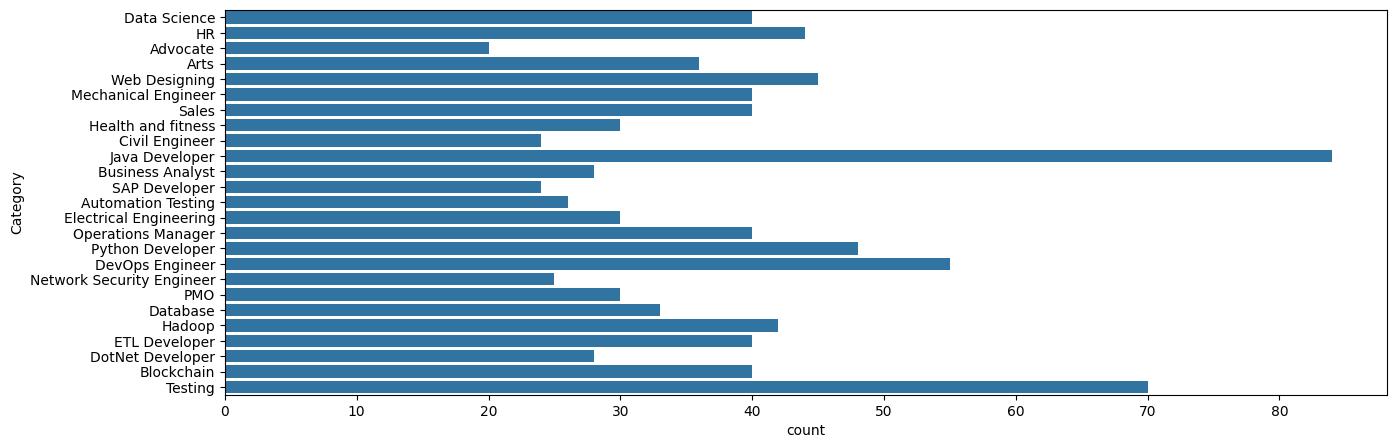

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.show()

In [10]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

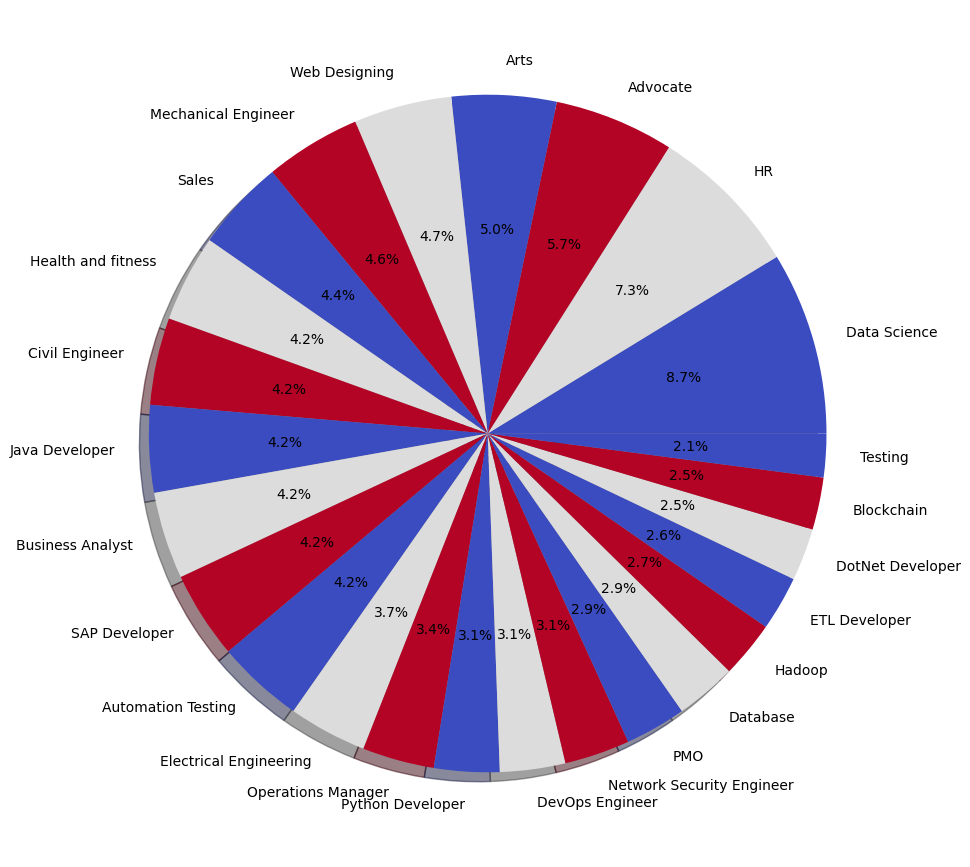

In [11]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

# Increase the figsize
plt.figure(figsize=(15, 11))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.coolwarm(np.linspace(0,1,3))) # from start to last of the colormap, from that 3 evenlyspaced colors used
plt.show()

# **RESUME EXPLORATION**

In [12]:
df['Category'][0]

'Data Science'

In [13]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [14]:
# # Check the original category distribution
# print("Original Category Distribution:")
# print(df['Category'].value_counts())

# # Get the largest category size (i.e., the category with the maximum number of entries)
# max_size = df['Category'].value_counts().max()

# # Perform oversampling
# balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

# # Shuffle the dataset to avoid any order bias
# df = balanced_df.sample(frac=1).reset_index(drop=True)

# # Check the balanced category distribution
# print("\nBalanced Category Distribution (After Oversampling):")
# print(df['Category'].value_counts())

 # **CLEANING THE DATASET**
###### -URLS, MENTIONS, HASHTAGS, SPECIAL CHARS, PUNCTUATIONMARKS

In [15]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)  # Remove URLs
    cleanText = re.sub('#\S+\s', ' ', cleanText)  # Remove hashtags
    cleanText = re.sub('@\S+', ' ', cleanText)  # Remove mentions
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)  # Remove special characters
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)  # Remove non-ASCII characters
    cleanText = re.sub('\s+', ' ', cleanText)  # Remove extra spaces

    return cleanText


In [16]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [17]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the

# **Words into categorical values**

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [20]:
df['Category'].unique()


array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [21]:
# 0- ADVOCATE, 1- ARTS.....

# array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

# **Performing Vectorization**

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')

# sometexts =  ["This is a simple document.",
#         " and this document is about machine learning.",
#         "Machine learning is amazing!"]

# XYZ = tfidf.fit_transform(sometexts)
# print(tfidf.get_feature_names_out())


In [23]:
tfidf.fit(df['Resume'])
reqdText = tfidf.transform(df['Resume'])
#reqdText now is a sparse matrix i.e containing vectors

# **Splitting for train and test**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reqdText, df['Category'], test_size = 0.2, random_state = 42)

In [25]:
X_train.shape


(769, 7347)

In [26]:
X_test.shape

(193, 7347)

# **Training model**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier # One-vs-Rest breaks down multi-class problems into several binary classification problems.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensure that X_train and X_test are dense if they are sparse
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

# 1. Train KNeighborsClassifier
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nKNeighborsClassifier Results:")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_knn)))
# print("Confusion Matrix:", confusion_matrix(y_test, y_pred_knn))
# print("Classification Report:", classification_report(y_test, y_pred_knn))




KNeighborsClassifier Results:
Accuracy: 0.9845


In [28]:
# 2. Train SVC
svc_model = OneVsRestClassifier(SVC())
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

print("\nSVC Results:")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_svc)))
# print("Confusion Matrix:", confusion_matrix(y_test, y_pred_svc))
# print("Classification Report:", classification_report(y_test, y_pred_svc))



SVC Results:
Accuracy: 0.9948


In [29]:
# 3. Train Logistic Regression model

logreg_model = OneVsRestClassifier(LogisticRegression())
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

print("\nLogistic Regression Results:")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_logreg)))
# print("Confusion Matrix:", confusion_matrix(y_test, y_pred_logreg))
# print("Classification Report:", classification_report(y_test, y_pred_logreg))


Logistic Regression Results:
Accuracy: 0.9948


In [30]:

import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))



In [36]:
# pickle.dump(logreg_model, open('logreg_model.pkl', 'wb'))
from joblib import dump, load
dump(logreg_model, 'logreg_model.joblib')
dump(svc_model, 'svc_model.joblib')

['svc_model.joblib']

# **Prediction**

In [37]:
# Function to predict the category of a resume
def predict(resume):
    # Clean the input text (remove URLs, hashtags, etc.)
    cleaned_text = cleanResume(resume)

    # Convert the cleaned text into numerical features using TF-IDF vectorizer
    vectorized_text = tfidf.transform([cleaned_text])

    # Convert sparse matrix to dense for prediction
    vectorized_text = vectorized_text.toarray()

    # Use the trained model to predict the category
    #predicted_category = svc_model.predict(vectorized_text)
    predicted_category = logreg_model.predict(vectorized_text)


    # Convert the numeric prediction back to the category label
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the predicted category name



In [38]:
myresume = """
Jane Smith is a certified personal trainer with over 5 years of experience in helping individuals achieve their fitness goals. Specializing in weight loss, strength training, and sports conditioning, Jane has developed personalized workout routines for clients of all ages and fitness levels. She has extensive knowledge in nutrition and exercise science, and uses this to create holistic health and fitness programs that are tailored to individual needs.

Jane holds a degree in Exercise Science and is a certified trainer through the National Academy of Sports Medicine (NASM). She has worked with athletes, seniors, and individuals with chronic health conditions, helping them improve their physical well-being and overall quality of life.

Her expertise includes:
- Weight Loss and Body Composition
- Strength Training and Resistance Exercises
- Cardio Conditioning
- Nutrition Coaching and Meal Planning
- Injury Prevention and Rehabilitation
- Functional Movement and Flexibility Training
- Group Fitness Classes

Certifications:
- Certified Personal Trainer, NASM
- CPR and First Aid Certified
- Yoga Instructor (200-Hour Certification)

Education:
BSc in Exercise Science, ABC University, 2014-2018

Work Experience:
- Personal Trainer at XYZ Fitness Gym (2018-Present)
- Fitness Coach at Wellness Center (2016-2018)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Health and Fitness-focused resume
predict(myresume)

'Health and fitness'

In [39]:
myresume= """Emily Lee
Data Scientist with expertise in machine learning, deep learning, and data visualization. Proficient in Python, R, and SQL, with experience in developing predictive models and data-driven insights.

Expertise:

Machine Learning (Regression, SVM, KNN, Random Forest)

Deep Learning (Neural Networks)

Data Visualization (Tableau, Matplotlib)

Natural Language Processing (NLP)

Data Mining and Big Data Analytics

Certifications:

Certified Data Scientist, IABAC

Python Certification, Data Science Council of America

Education:

Master of Science in Data Science, XYZ University, 2018-2020

Work Experience:

Data Scientist at ABC Corporation (2020-Present)

Data Analyst at DEF Startups (2018-2020)

Languages:

English (Fluent)

French (Conversational) """

predict(myresume)

'Data Science'

In [40]:
myresume="""
Ethan Hall
 Automation Tester | Selenium & Appium Expert

Professional Summary
Automation Tester with extensive experience in developing automated test scripts using Selenium and Appium. Expertise in test automation frameworks and agile development methodologies. Skilled in ensuring the quality and reliability of software through efficient test automation and defect tracking.

Core Competencies
Selenium and Appium Automation
Test Automation Frameworks (TestNG, JUnit)
Agile Development Methodologies
Defect Tracking and Reporting

Professional Experience
Automation Tester
 ABC Technologies | 2019–Present
Developed and maintained automated test scripts for web and mobile applications using Selenium and Appium.
Created and implemented test automation frameworks with TestNG and JUnit, improving test execution efficiency by 40%.
Collaborated with cross-functional teams using Agile methodologies to ensure timely delivery of quality software products.
Tracked and reported defects using Jira, ensuring clear communication with developers for quick resolution.
Junior QA Engineer
 DEF Startups | 2017–2019
Assisted in the creation of automated test scripts for web applications using Selenium, improving the speed of testing cycles.
Supported manual testing efforts and helped integrate automated testing into the QA workflow.
Reported bugs and collaborated with development teams to resolve issues promptly.

Education
Bachelor of Science in Computer Science
 YZ University | 2015–2019

Certifications
Certified Automation Tester (CAT) – [Year of Certification]
Selenium Certification – [Year of Certification]

Languages
English (Fluent)
French (Conversational)


"""

predict(myresume)

'Automation Testing'